# Single Model

Bellman equation for single individual j working in period t:
$$V_{t}(s_{t}^{j},\varepsilon_{t}^{j})=\underset{C_{t},d_{t}^{j}}{max}\left\{ U^{j}(C_{t},d_{t}^{j},s_{t}^{j})+\sigma_{\varepsilon}\varepsilon_{t}(d_{t}^{j})+\beta E_{t}\left[\pi_{t+1}^{j}V_{t+1}^{j}(s_{t+1}^{j},\varepsilon_{t+1}^{j})+(1-\pi_{t+1}^{j})B(a_{t})\right]\right\} $$

Bellman equation for single individual j retired in period t:
$$V_{t}(s_{t}^{j},\varepsilon_{t}^{j})=\underset{C_{t},d_{t}^{j}}{max}\left\{ U^{j}(C_{t},0,s_{t}^{j})+\beta E_{t}\left[\pi_{t+1}^{j}V_{t+1}^{j}(s_{t+1}^{j},\varepsilon_{t+1}^{j})+(1-\pi_{t+1}^{j})B(a_{t})\right]\right\} $$

Budget constraint:
$$\underset{=m_{t}}{\underbrace{C_{t}+a_{t}}}=Ra_{t-1}+y_{t}^{j}+P^j(s_t)$$

The bequest motive:
$$B(a_{t})=\gamma a_{t}$$

Preferences (CRRA):
$$U^{j}(C_{t},d_{t}^{j},s_{t}^{j})=\frac{C_{t}^{1-\rho}}{1-\rho}+\alpha^{j}(s_{t}^{j})1_{\left\{ d_{t}^{j}=0\right\} }$$

State variables:
$$s_t = (age^j_t, d^j_t, y^j_t, \zeta_t,e^j,, elig^j, ch^j, a_{t-1})$$

We have not included the two state variables Grandchilden and health. 
Vi har efter bedste evne taget parametrene fra din artikel til modelløsningen.

# Setup

In [1]:
from consav import runtools
runtools.write_numba_config(disable=0,threads=8)

In [2]:
%matplotlib inline
# reload module each time cell is run
%load_ext autoreload
%autoreload 2
from Model import RetirementModelClass
import numpy as np
import matplotlib.pyplot as plt
import funs
import figs

# Solution and simulation

### Solve model and initialize simulation

In [3]:
model_men = RetirementModelClass(name='men',solmethod='egm')
model_women = RetirementModelClass(name='women',solmethod='egm')
model_men.solve()
model_women.sol = model_men.sol

In [18]:
# Wealth distribution
np.random.seed(2019)
dev = 1.25
M_init = np.random.lognormal(-0.5*(dev**2),dev,model_men.par.simN)+0.8
model_men.par.simM_init = M_init
model_women.par.simM_init = M_init
print('mean:',np.mean(M_init))
print('std:',np.std(M_init))

# Allocate states
state_men = funs.create_states(model_men,'male',0.95,0.0,1)
model_men.par.simStates = state_men
state_women = funs.create_states(model_women,'female',0.97,0.0,1)
model_women.par.simStates = state_women

mean: 1.8170682300256835
std: 1.6525118057867347
fractions: [0.95 0.   1.  ]
fractions: [0.97 0.   1.  ]


### Simulate model

In [19]:
model_men.simulate()
model_women.simulate()

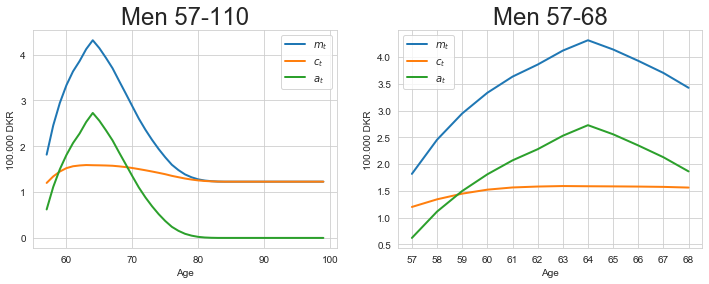

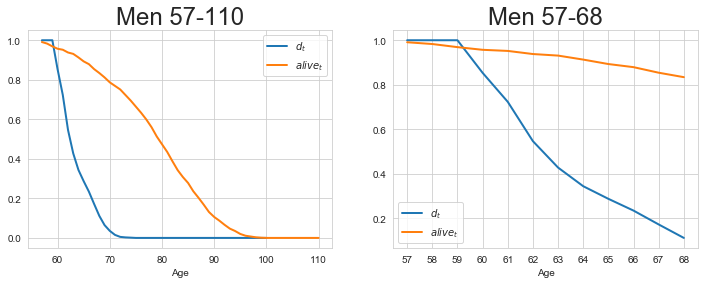

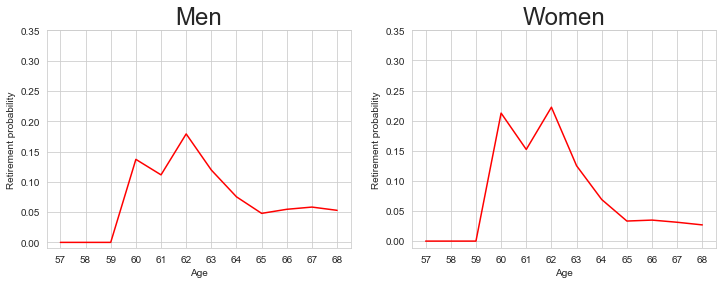

In [20]:
fig, axs = plt.subplots(1,2,figsize=(12,4))
figs.lifecycle(model_men,axs[0],ages=[57,110])
axs[0].set_title('Men 57-110',size=24)
figs.lifecycle(model_men,axs[1])
axs[1].set_title('Men 57-68',size=24)

fig, axs = plt.subplots(1,2,figsize=(12,4))
figs.lifecycle(model_men,axs[0],['d','alive'],ages=[57,110])
axs[0].set_title('Men 57-110',size=24)
figs.lifecycle(model_men,axs[1],['d','alive'])
axs[1].set_title('Men 57-68',size=24)

fig, axs = plt.subplots(1,2,figsize=(12,4))
figs.retirement_probs(model_men,axs[0])
axs[0].set_title('Men',size=24)
figs.retirement_probs(model_women,axs[1])
axs[1].set_title('Women',size=24)
plt.show()

C:\Users\Frederik\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.


(1.5, 1.65)

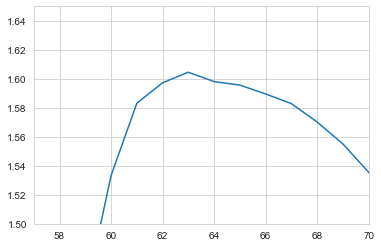

In [7]:
plt.plot(np.arange(57,111),np.nanmean(model_men.sim.c, axis=1))
plt.xlim((57,70))
plt.ylim((1.5,1.65))

C:\Users\Frederik\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.


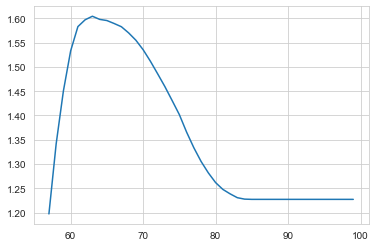

In [8]:
plt.plot(np.arange(57,111),np.nanmean(model_men.sim.c, axis=1))

# Visualizing the solution

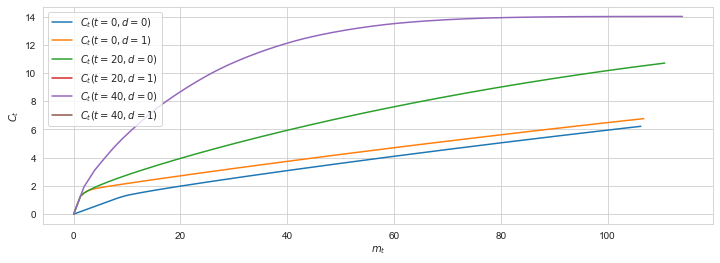

In [9]:
fig, axs = plt.subplots(figsize=(12,4))
figs.policy(model_men,axs,policy_type='c',time=[0,20,40],d_choice=[0,1],states=[15])
plt.show()

# Accuracy test

In [10]:
for na in [50,100,150,200,250]:
    model = RetirementModelClass(Na = na)
    model.solve()
    model.simM_init = M_init
    model.par.simStates = np.random.randint(16,size=model.par.simN) # allocate random states
    model.simulate(accuracy_test=True)
    print('Na:',na)
    print('Euler error:',np.nanmean(np.log10(abs(model.sim.euler))))

Na: 50
Euler error: -2.8915306842252932
Na: 100
Euler error: -3.4034986051234735
Na: 150
Euler error: -3.9385974841669733
Na: 200
Euler error: -4.322135813832834
Na: 250
Euler error: -4.517997651488953


# Time the model and simulation

In [32]:
model = RetirementModelClass(name='baseline',solmethod='egm')
model.par.states = [(0,0,0,1), (0,1,0,1), (1,0,0,1), (1,1,0,1)] # only 4 states across gender and elig
model.par.simStates = np.random.randint(4,size=model.par.simN) # random states

In [33]:
def solve():
    model.solve() 
    
def simulate():
    model.simulate()

funcs = [solve,simulate]
argu = dict([(funcs[0], []),
             (funcs[1], [])])
names = dict([(funcs[0], 'solve'),
              (funcs[1], 'simulate')])

Run model/simulation 10 times

In [34]:
funs.my_timer(funcs,argu,names,unit='s',ndigits=2,Ntimes=10)

time unit is: s
+----------+------+--------+------+------+-------+
|   func   |  lq  | median | mean |  uq  | neval |
+----------+------+--------+------+------+-------+
|  solve   | 3.92 |  4.34  | 4.34 | 4.61 |  10.0 |
| simulate | 1.41 |  1.46  | 1.51 | 1.53 |  10.0 |
+----------+------+--------+------+------+-------+


# Estimation